In [4]:
import sys
import os
import numpy as np
# Get the current directory of the notebook
notebook_dir = os.getcwd()

# Add the parent directory to sys.path
parent_dir = os.path.abspath(os.path.join(notebook_dir, '..'))
if parent_dir not in sys.path:
    sys.path.append(parent_dir)
# Add the 2nd level parent directory to sys.path
parent_dir = os.path.abspath(os.path.join(parent_dir, '..'))
if parent_dir not in sys.path:
    sys.path.append(parent_dir)

import bemt_param_fitter
import inflow_model.propeller_lookup_table as propeller_lookup_table

Prepare data for fitting. 

In [5]:
import data_factory

# fitting_subfolder = "wind_near_wall_bemt_fitting"
fitting_subfolder = "wind_near_wall_bemt_unit_test"
factory = data_factory.FittingFactory()
data_list = data_factory.generate_data_list(fitting_subfolder, '.pkl')
print(f"Fitting Data list:")
for data in data_list:
    print(data)
datasets = factory.prepare_datasets(data_list)

fitting_subfolder = "wind_near_wall_bemt_fitting_validation"
factory = data_factory.FittingFactory()
data_list = data_factory.generate_data_list(fitting_subfolder, '.pkl')
print(f"Validtion Data list:")
for data in data_list:
    print(data)
datasets_validation = factory.prepare_datasets(data_list)

Fitting Data list:
wind_near_wall_bemt_unit_test\test_wind_near_wall_x0_0_y0_0_z0_0_d100_4_fitting.pkl
wind_near_wall_bemt_unit_test\test_wind_near_wall_x0_0_y0_0_z5_0_d100_4_fitting.pkl
wind_near_wall_bemt_unit_test\test_wind_near_wall_x0_0_y0_0_zn5_0_d100_4_fitting.pkl
wind_near_wall_bemt_unit_test\test_wind_near_wall_xn3_0_y0_0_z0_0_d100_4_fitting.pkl
wind_near_wall_bemt_unit_test\test_wind_near_wall_xn3_0_y0_0_z5_0_d100_4_fitting.pkl
wind_near_wall_bemt_unit_test\test_wind_near_wall_xn3_0_y0_0_zn5_0_d100_4_fitting.pkl
Validtion Data list:
wind_near_wall_bemt_fitting_validation\test_wind_near_wall_x0_0_y0_0_z10_0_d0_5_validation.pkl
wind_near_wall_bemt_fitting_validation\test_wind_near_wall_x0_0_y0_0_z1_0_d0_5_validation.pkl
wind_near_wall_bemt_fitting_validation\test_wind_near_wall_x0_0_y0_0_z4_0_d0_5_validation.pkl
wind_near_wall_bemt_fitting_validation\test_wind_near_wall_x0_0_y0_0_zn10_0_d0_5_validation.pkl
wind_near_wall_bemt_fitting_validation\test_wind_near_wall_x0_0_y0_0_zn1

[PropellerLookupTable] Reading data from ..\..\inflow_model\lookup_table\apc_8x6_with_trail.yaml
dataset.u_free_0[i]: [0. 0. 5.], dataset.v_forward_0[i]: [ 8.43495273e-16  1.33234485e-15 -3.24938325e-02], dataset.shared_r_disk[i]: [[ 1.00000000e+00  5.72921767e-32  4.43432273e-17]
 [-6.04103821e-32  1.00000000e+00  7.03197663e-17]
 [-4.43432273e-17 -7.03197663e-17  1.00000000e+00]], dataset.omega_0[i]: 909.6950908500144, is_ccw_blade: True
dataset.u_free_1[i]: [0. 0. 5.], dataset.v_forward_1[i]: [ 8.43495273e-16  1.33234485e-15 -3.24938325e-02], dataset.shared_r_disk[i]: [[ 1.00000000e+00  5.72921767e-32  4.43432273e-17]
 [-6.04103821e-32  1.00000000e+00  7.03197663e-17]
 [-4.43432273e-17 -7.03197663e-17  1.00000000e+00]], dataset.omega_1[i]: 909.6950908500376, is_ccw_blade: False
dataset.u_free_2[i]: [0. 0. 5.], dataset.v_forward_2[i]: [ 8.43495273e-16  1.33234485e-15 -3.24938325e-02], dataset.shared_r_disk[i]: [[ 1.00000000e+00  5.72921767e-32  4.43432273e-17]
 [-6.04103821e-32  1.00

2.4956764462263545

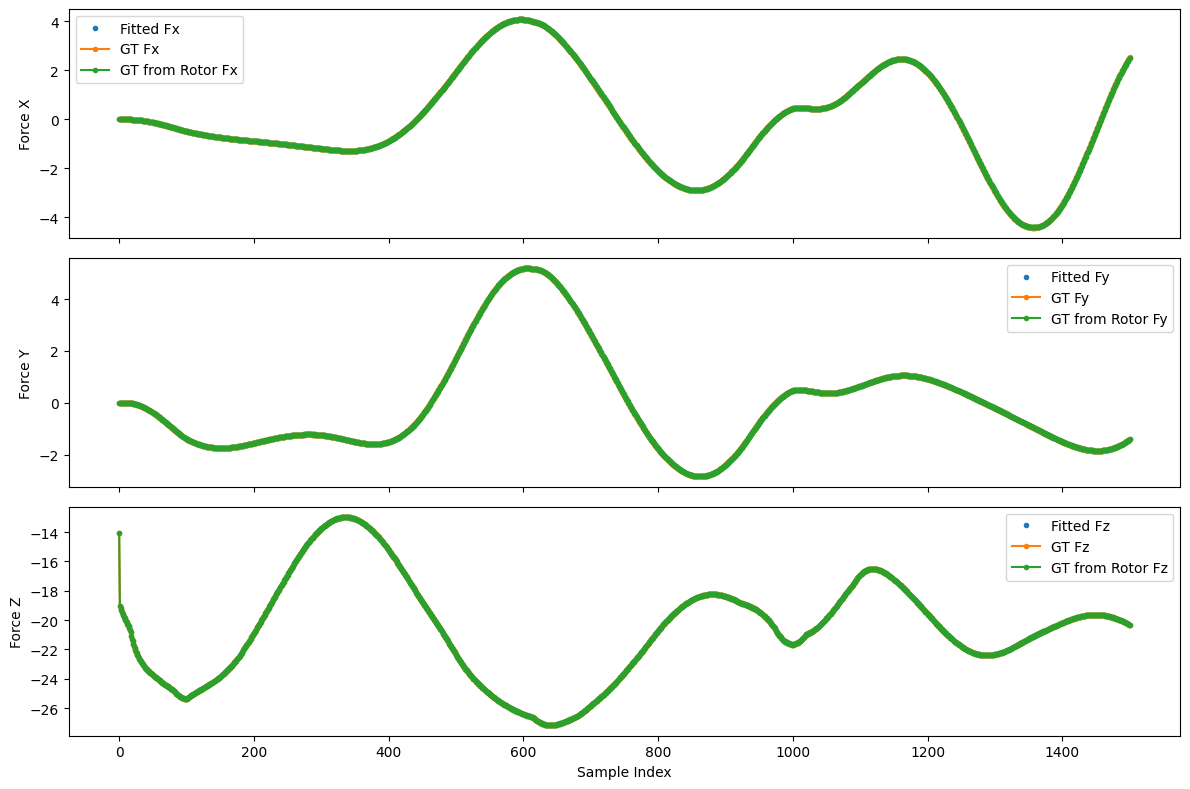

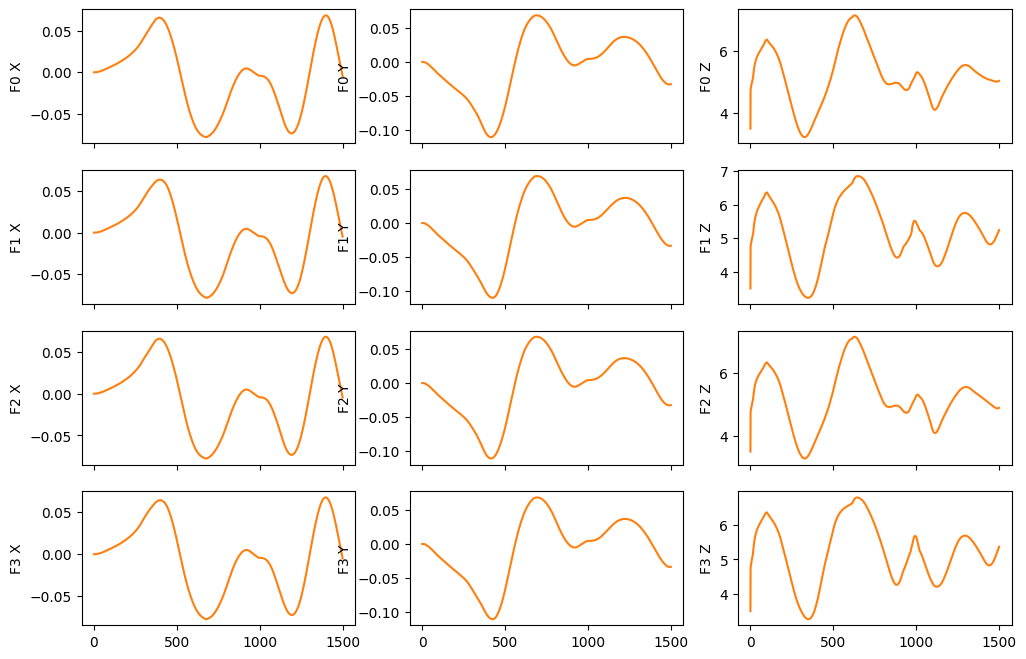

In [ ]:
fitter = bemt_param_fitter.BemtParamFitter()
x = np.array([5.3, 1.7, 1.8, np.radians(20.6)]) # ground truth
fitter.adjust_resolution(True)
lookup_table = propeller_lookup_table.PropellerLookupTable.Reader("apc_8x6_with_trail")
fitter.get_loss(x, datasets[1:2], can_log=True, lookup_table=lookup_table, is_using_lookup_table=False)

In [ ]:
x = np.array([5.3, 1.7, 1.8, np.radians(20.6)]) # ground truth
# x = np.array([2., 4.33202413, 0., 0.17453294])    # initial guess from below
# x = np.array([5.34535047, 1.49428897, 1.63329779, 0.46934187])   # initial guess from above
blade = bemt_param_fitter.FittedBlade()
bemt_param_fitter.get_loss(x, datasets[:2], blade, is_in_validation=True)

In [ ]:
blade = bemt_param_fitter.FittedBlade()
fitted_params = bemt_param_fitter.fit_params(datasets, blade, np.array([5.31194203, 1.46627105, 1.72517079, 0.45174155]), is_fine_tune=True)

Generate a lookup table using inflow_model.propeller_lookup_table_users_guide.ipynb and check the loss over all sammple data.

In [ ]:
# lookup_table = propeller_lookup_table.PropellerLookupTable.Reader("apc_8x6_fitted")
# lookup_table = propeller_lookup_table.PropellerLookupTable.Reader("apc_8x6_fitted2")
lookup_table = propeller_lookup_table.PropellerLookupTable.Reader("apc_8x6_with_trail")
bemt_param_fitter.test_fitted_lookup_table(datasets, lookup_table)

In [10]:
import inflow_model
# blade = bemt_param_fitter.FittedBlade()
blade = inflow_model.blade_params.APC_8x6()

bet_instance = inflow_model.bet.BladeElementTheory(blade)

u_free = np.array([0.0, 0.0, 5.0])
u_free = np.array([0.0, 0.0, 0.0])

v_forward = np.array([-1.28200984, 2.41520771, -4.11132144])
v_forward = np.array([0.0, 0.0, 0.0])
r_disk = bet_instance.pitch_rotor_disk_along_y_axis(np.radians(0))
# r_disk = np.array([
#     [0.99651236, 0.00207281, 0.08341949],
#     [0.00337892, 0.99786917, -0.06515905],
#     [-0.0833768, 0.06521366, 0.99438196]
# ])
omega = 1083.5639735524062
omega = 1300
is_ccw_blade = True

lookup_table = propeller_lookup_table.PropellerLookupTable.Reader("apc_8x6_with_trail")

f_ccw = bemt_param_fitter.BemtParamFitter.compute_thrust_with_lookup_table(u_free, v_forward, r_disk, omega, is_ccw_blade, lookup_table)
f_ccw_compare = bet_instance.get_rotor_forces(u_free, v_forward, r_disk, omega, is_ccw_blade)[:3]
# f_ccw_compare = fitter.compute_model_thrust(u_free, v_forward, r_disk, omega, is_ccw_blade)

print(f"f_ccw: {f_ccw}, f_ccw_compare: {f_ccw_compare}")

print(r_disk@f_ccw_compare - f_ccw)


[PropellerLookupTable] Reading data from ..\..\inflow_model\lookup_table\apc_8x6_with_trail.yaml
f_ccw: [-2.08415939e-17 -1.13867671e-16  1.05611492e+01], f_ccw_compare: (-2.6847048076403968e-17, -1.1556925061519425e-16, 10.19858844950661)
[-6.00545418e-18 -1.70158002e-18 -3.62560797e-01]
